In [887]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import scipy.constants as const

mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

C:\Users\magnu\AppData\Local\Temp\ipykernel_90276\1234985608.py:7: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  mpl.use("pgf")


In [888]:
from scipy.special import wofz
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Voigt profile function
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=50000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

# Auswertung F43: Ramman-Spektroskopie

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [891]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 
                   10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 359, 358, 357, 356, 355, 354, 353, 340, 345, 347, 
                   350, 351, 350.5, 350.25, 350.6, 350.35, 351.5, 352, 349, 348, 330,100, 200, 75,50,
                   150, 275, 230, 300, 320]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 
                    3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 
                    1.67, 1.67, 1.67, 1.64, 1.57, 1.52, 1.48, 1.47, 1.46, 1.43, 8.80, 8.67, 8.46, 8.21, 
                    2.84, 5.63, 7.85, 4.15, 7.09, 1.35, 1.10, 7.98, 7.72, 6.79, 1.5, 7.10, 0.75, 5.20,
                    6.01, 1.92, 3.50, 1.29, 3.95]) # mV
# correct sign
voltage = - voltage

# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle').reset_index(drop=True)
# wrap values above 180 to to negative, such that 359 equiv to -1
mask = data['angle'] > 180
data.loc[mask, 'angle'] = data.loc[mask, 'angle'] - 360



In [892]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-12, -5)

(-12.0, -5.0)

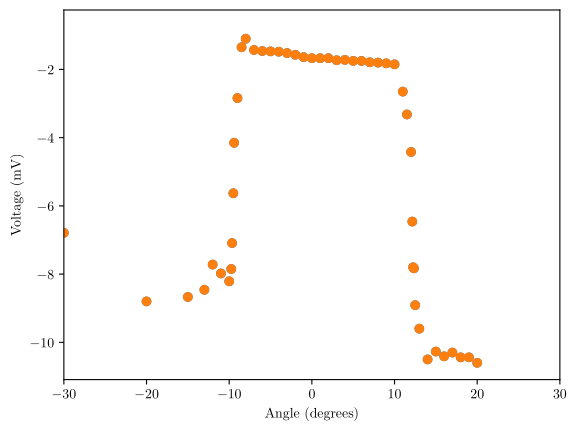

In [893]:
%matplotlib inline
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-30, 30)
plt.show()

In [894]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost

# looking at the first transition
mask1 = (data['angle'] > 9) & (data['angle'] < 15)

# continue with minuit somehow TODO
inx_i = 40
inx_f = 49
deg_fit = data["angle"][inx_i: inx_f]
u_fit = data['voltage'][inx_i: inx_f]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_1, t1_1 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.448e+04 (χ²/ndof = 2068.3)│              Nfcn = 59               │
│ EDM = 6.02e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   22.72   │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 1 │ t1   │   2.957   │   0.012   │   -0.012   │   0.012    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.12   │   0.12    │  -0.012   │   0.012   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0133  1.40e-3 │
│ t1 │  1.40e-3 0.000149 │
└────┴───────────────────┘

In [895]:
inx_i1 = 10
inx_f1 = 20
deg_fit = data["angle"][inx_i1: inx_f1]
u_fit = data['voltage'][inx_i1: inx_f1]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_2, t1_2 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.347e+04 (χ²/ndof = 1683.6)│              Nfcn = 63               │
│ EDM = 9.91e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   25.36   │   0.11    │   -0.11    │    0.11    │         │         │       │
│ 1 │ t1   │  -2.624   │   0.009   │   -0.009   │   0.009    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.11   │   0.11    │  -0.009   │   0.009   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0124 -1.02e-3 │
│ t1 │ -1.02e-3 8.45e-05 │
└────┴───────────────────┘

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_90276\642263788.py:7: SyntaxWarning: invalid escape sequence '\p'
  label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
C:\Users\magnu\AppData\Local\Temp\ipykernel_90276\642263788.py:9: SyntaxWarning: invalid escape sequence '\p'
  label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))


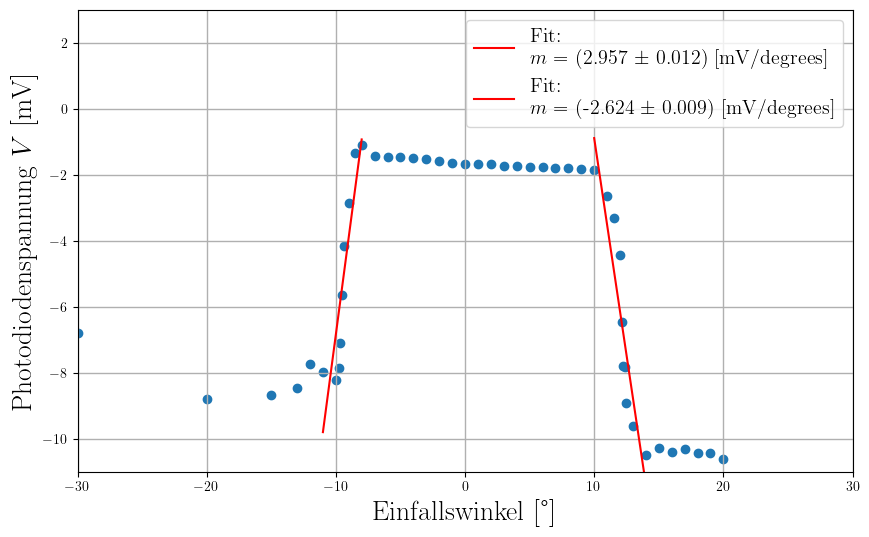

In [896]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=1.0)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.scatter(data['angle'], data['voltage'])
plt.plot(data['angle'][inx_i:inx_f],linear(data['angle'][inx_i:inx_f], t0_1, t1_1), color = 'red',
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
plt.plot(data['angle'][inx_i1:inx_f1],linear(data['angle'][inx_i1:inx_f1], t0_2, t1_2), color = 'red', 
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))
plt.xlabel('Einfallswinkel [°]', fontsize = 20)
plt.ylabel('Photodiodenspannung $V$ [mV]', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.xlim(-30, 30)
plt.ylim(-11,3)
plt.savefig("Justierung.png")
plt.show()

As a next step we meuarese the voltace characteristic of the Photomultiplier. For this purpouse, we pump vacuum into the gas-cell and vary the applied voltage, i.e. current, and measure the counts for three minuts. We note the mean value of the measured counts and their standart deviation. During the measurements, the preasure of the cell is $p = (30\pm 5)$ mbar. 

In [898]:
u_in = np.array([1299, 1349,1400,1450,1500,1549,1600,1650,1699,1751,1801,1850,1900,1950,2000]) #V
i_in = np.array([.095, 0.099,0.102,.106,.110,.113,0.117,.120,.124,.128,.131,.135,.139,.142,.146,0.136]) #mA
count = np.array([0,0,0,0.10,0.5,2.30,4.0,6.60,24.90,95.90,222.20,380.70,1319.20,1683.6,969])
dcount= np.array([0,0,0,0.32,0.71,2.0,1.94,2.17,4.58,7.87,14.19,22.76,46.38,37.05,22.44]) #
np.sort(u_in)
np.sort(i_in)


array([0.095, 0.099, 0.102, 0.106, 0.11 , 0.113, 0.117, 0.12 , 0.124,
       0.128, 0.131, 0.135, 0.136, 0.139, 0.142, 0.146])

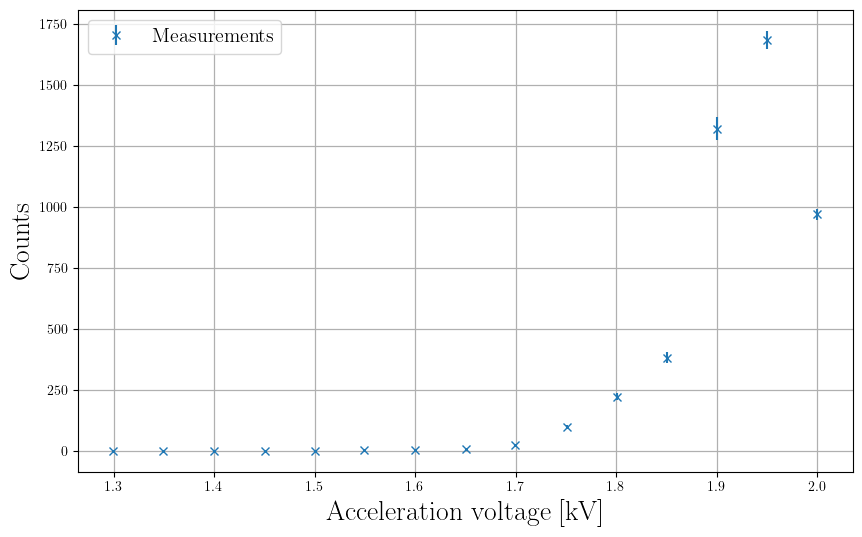

In [899]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(u_in/1000, count, dcount, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the last three measurement we could notice strong deviations from the expected shape of the voltage characteristics. After a carefule look at the laser, our tutor could determine that the laser had major issues. For this reason the next parts of the experiment will be studied with old measurements. 

We start by plotting the current characteristic. 

In [901]:
U3=np.array([1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050])#V
U3_err=np.ones(len(U3))*0.5#V
Rate=np.array([3.22,2.60,8.30,18.90,145.6,1822.1,9693.6,25885,
    51397.6,78234.1,101675.8,118372.7])
Rate_err=np.array([1.66,1.51,2.31,3.45,14.57,37.54,82.43,193.9,184.92,
  409.37,327.07,473.9])

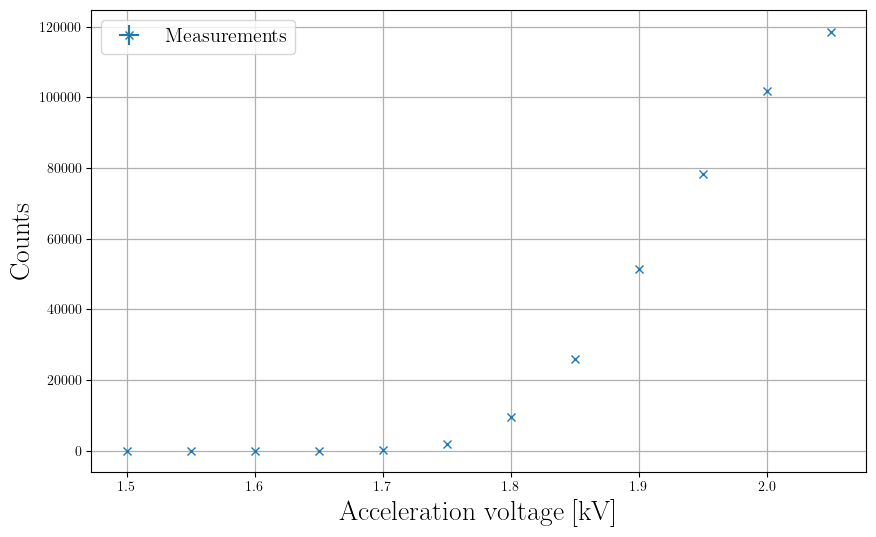

In [902]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(U3/1000, Rate, xerr = U3_err/1000, yerr=Rate_err, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the response of the Photomultiplier we try to find a 'good' accelearation voltage. For this we choose a voltage, for which the change in count is maximised, ie. the strongest gradient of the curve around $\left(1925 \pm10\right)V$

### Deuterium Measurements

In [905]:
# importing deuterium data
D2_data = pd.read_csv("Measurements/D2.txt", sep='\t', decimal=',', header=None)
D2_Underground_data = pd.read_csv("Measurements/D2_Untergrund.txt", sep='\t',decimal=',', header=None)
D2_data.columns = ["a", "b", "wavelength", "counts"]
D2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

D2_data["wavenumber"] = 1/D2_data["wavelength"]
D2_Underground_data["wavenumber"] = 1/D2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
D2_data["wavenumber"] = D2_data["wavenumber"]*10**7
D2_Underground_data["wavenumber"] = D2_Underground_data["wavenumber"]*10**7
D2_data["count"] = D2_data["counts"] - D2_Underground_data["counts"]


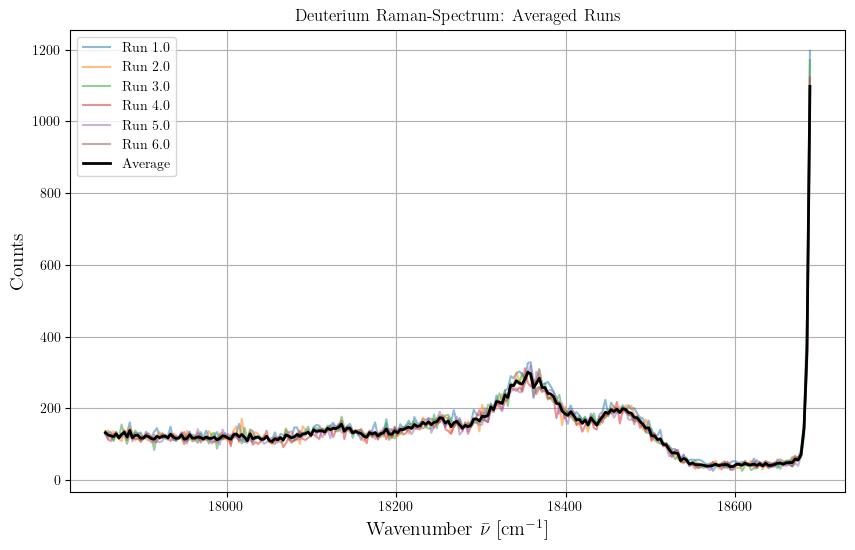

In [906]:
# Group data by wavenumber and average the counts across all 'a' values
data = D2_data.groupby("wavenumber", as_index=False)["counts"].mean()
dataEr = D2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()

data['count'] = data['counts'] - dataEr['counts']

# Plot the individual runs and the averaged data
fig = plt.figure(figsize=(10, 6))

# Plot data for each series 'a'
for a in D2_data['a'].unique():
    mask = D2_data['a'] == a
    plt.plot(D2_data['wavenumber'][mask], D2_data['counts'][mask], alpha=0.5, label=f"Run {a}")


# Plot the averaged data
plt.plot(data["wavenumber"], data["counts"], color="black", linewidth=2, label="Average")

# Add plot details
plt.title("Deuterium Raman-Spectrum: Averaged Runs")
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend()
plt.grid()
plt.show()


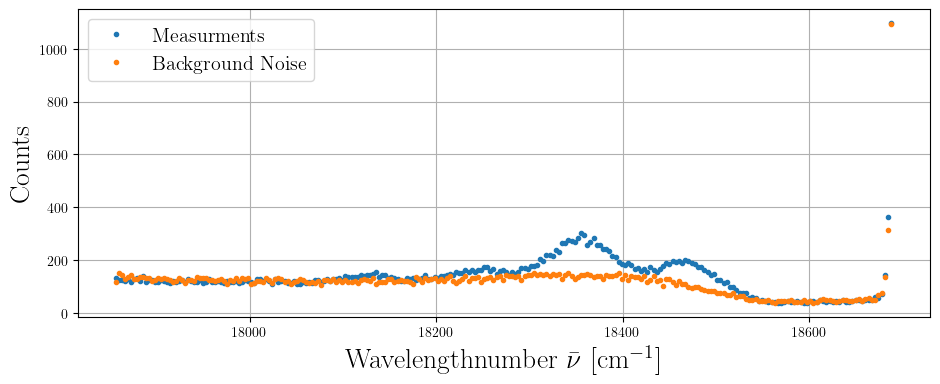

In [907]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(dataEr["wavenumber"], dataEr["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

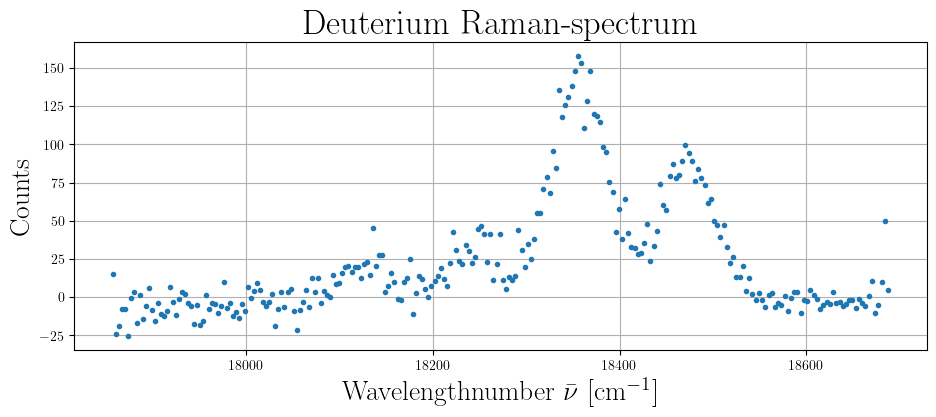

In [908]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Deuterium Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

#plt.ylim(-0.10,200)
#plt.xlim(537,560)
plt.show()

In [909]:
# defining peak ranges
peak1 = data[(data["wavenumber"] > 18422) & (data["wavenumber"] < 18520)]
peak2 = data[(data["wavenumber"] > 18290) & (data["wavenumber"] < 18422)]
peak3 = data[(data["wavenumber"] > 18190) & (data["wavenumber"] < 18290)]
peak4 = data[(data["wavenumber"] > 18070) & (data["wavenumber"] < 18180)]
# making suobplots for all of the peaks
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].errorbar(peak1["wavenumber"], peak1["count"],
                    label="Peak 1", linestyle='None', fmt='.')
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"],
                    label="Peak 2", linestyle='None', fmt='.')
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], 
                    label="Peak 3", linestyle='None', fmt='.')
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"],
                    label="Peak 4", linestyle='None', fmt='.')
ax[0,0].legend(fontsize='x-large', loc='best')
ax[1,0].legend(fontsize='x-large', loc='best')
ax[0,1].legend(fontsize='x-large', loc='best')
ax[1,1].legend(fontsize='x-large', loc='best')
ax[0,0].grid()
ax[1,0].grid()
ax[0,1].grid()
ax[1,1].grid()

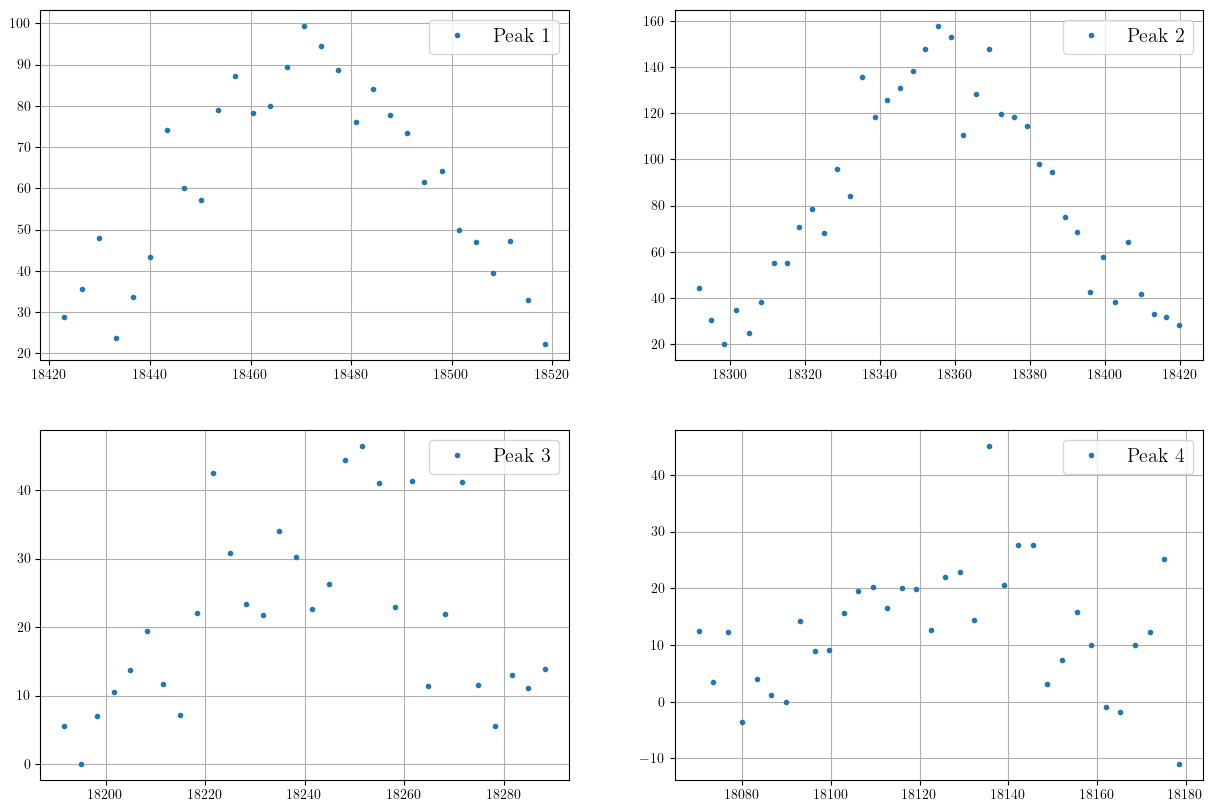

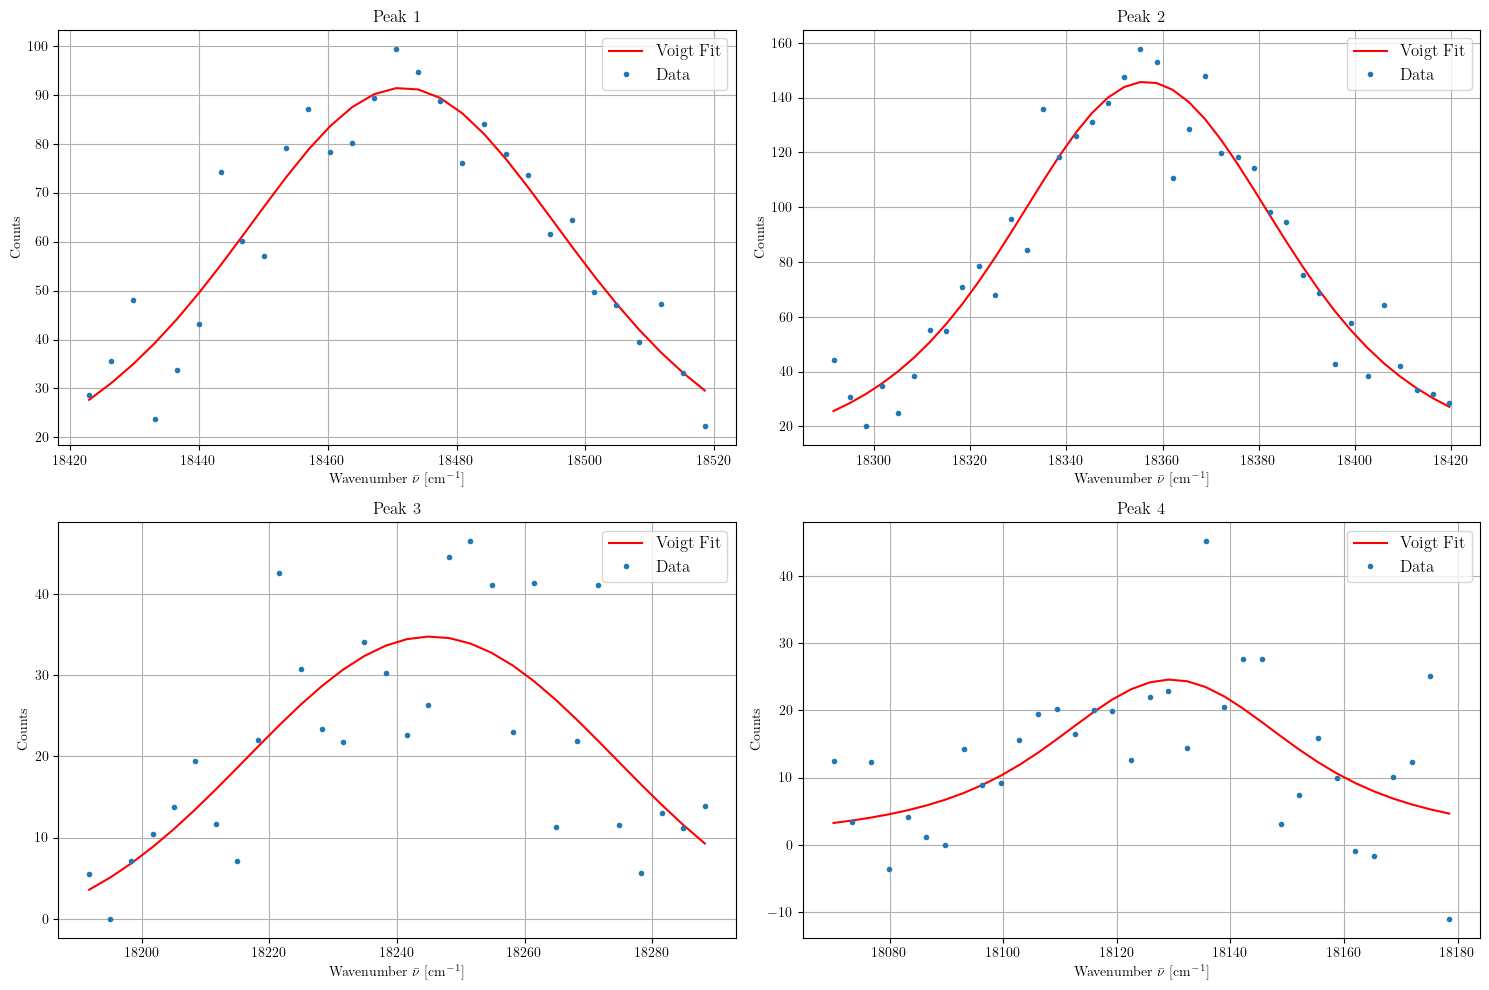

Fitted Voigt Parameters:
Peak 1: Amplitude=8943.20, Center=18471.74 cm⁻¹, Sigma=14.13, Gamma=25.53
Peak 2: Amplitude=14017.68, Center=18356.51 cm⁻¹, Sigma=16.86, Gamma=22.83
Peak 3: Amplitude=1980.30, Center=18245.30 cm⁻¹, Sigma=32.75, Gamma=-13.57
Peak 4: Amplitude=1849.53, Center=18129.50 cm⁻¹, Sigma=9.99, Gamma=20.26


In [910]:
from scipy.special import wofz
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Voigt profile function
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=50000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

# Updated initial guesses based on Gaussian fits
initial_guesses_voigt = [
    [89.39, 18471.69, 29.98, 5],  # Peak 1
    [141.12, 18356.58, 31.61, 5], # Peak 2
    [35.56, 18245.86, 25.11, 5],  # Peak 3
    [23.43, 18128.60, 24.34, 5],  # Peak 4
]

# Fit each peak with the Voigt profile
popt1, perr1 = fit_voigt(peak1["wavenumber"], peak1["count"], initial_guesses_voigt[0])
popt2, perr2 = fit_voigt(peak2["wavenumber"], peak2["count"], initial_guesses_voigt[1])
popt3, perr3 = fit_voigt(peak3["wavenumber"], peak3["count"], initial_guesses_voigt[2])
popt4, perr4 = fit_voigt(peak4["wavenumber"], peak4["count"], initial_guesses_voigt[3])

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Peak 1
ax[0,0].errorbar(peak1["wavenumber"], peak1["count"], label="Data", linestyle='None', fmt='.')
ax[0,0].plot(peak1["wavenumber"], voigt(peak1["wavenumber"], *popt1), label="Voigt Fit", color="red")
ax[0,0].legend(fontsize='large')
ax[0,0].set_title("Peak 1")

# Peak 2
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"], label="Data", linestyle='None', fmt='.')
ax[0,1].plot(peak2["wavenumber"], voigt(peak2["wavenumber"], *popt2), label="Voigt Fit", color="red")
ax[0,1].legend(fontsize='large')
ax[0,1].set_title("Peak 2")

# Peak 3
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], label="Data", linestyle='None', fmt='.')
ax[1,0].plot(peak3["wavenumber"], voigt(peak3["wavenumber"], *popt3), label="Voigt Fit", color="red")
ax[1,0].legend(fontsize='large')
ax[1,0].set_title("Peak 3")

# Peak 4
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"], label="Data", linestyle='None', fmt='.')
ax[1,1].plot(peak4["wavenumber"], voigt(peak4["wavenumber"], *popt4), label="Voigt Fit", color="red")
ax[1,1].legend(fontsize='large')
ax[1,1].set_title("Peak 4")

# Add grid and labels
for i in range(2):
    for j in range(2):
        ax[i, j].grid()
        ax[i, j].set_xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]")
        ax[i, j].set_ylabel("Counts")

plt.tight_layout()
plt.show()

# Print the fit parameters for all peaks
print("Fitted Voigt Parameters:")
for i, popt in enumerate([popt1, popt2, popt3, popt4], start=1):
    print(f"Peak {i}: Amplitude={popt[0]:.2f}, Center={popt[1]:.2f} cm⁻¹, Sigma={popt[2]:.2f}, Gamma={popt[3]:.2f}")


In [911]:
# plot of the entire spectrum with fits
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt1), label="Peak 1", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt2), label="Peak 2")
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt3), label="Peak 3")
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt4), label="Peak 4")

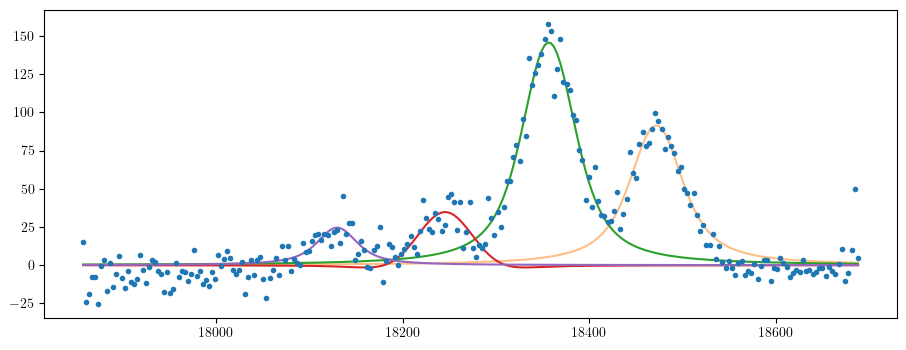

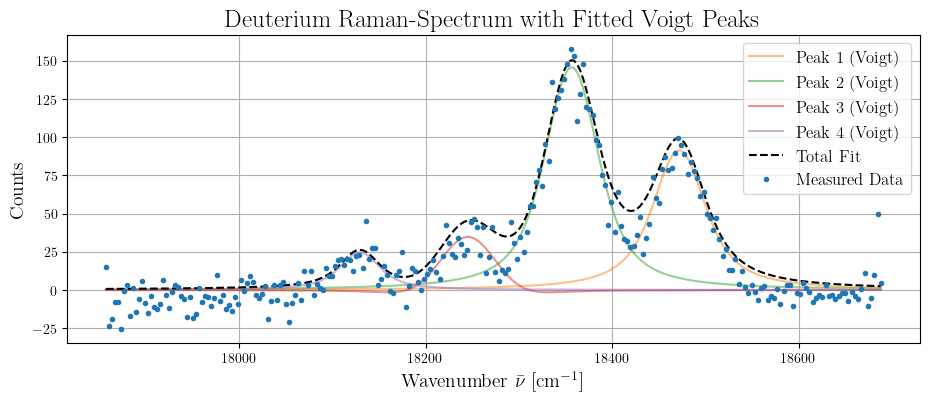

     peak        center  error_center  gaussian_width  lorentzian_width  \
0  Peak 1  18471.735728      1.091502       14.129906         25.533170   
1  Peak 2  18356.508250      0.938368       16.860994         22.829379   
2  Peak 3  18245.302398      2.816294       32.746419        -13.569690   
3  Peak 4  18129.504005      3.666800        9.991525         20.261575   

      intensity  
0   8943.198772  
1  14017.681850  
2   1980.303776  
3   1849.531638  


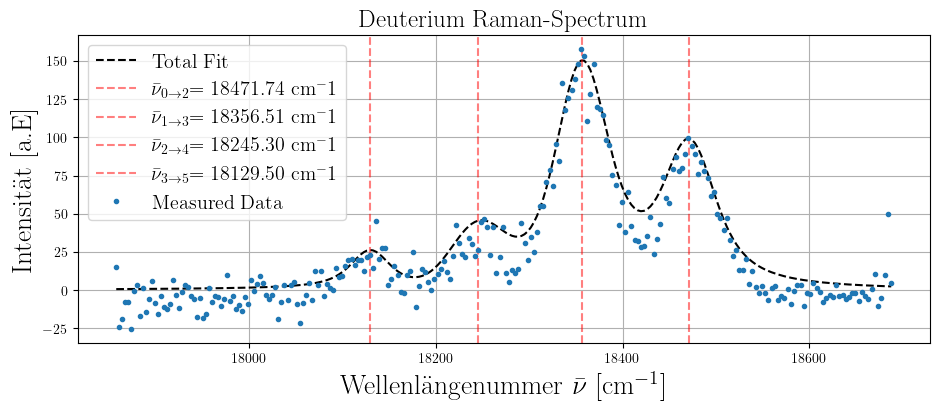

In [912]:
# Total Voigt fit for the entire spectrum
total_fit = (
    voigt(data["wavenumber"], *popt1) +
    voigt(data["wavenumber"], *popt2) +
    voigt(data["wavenumber"], *popt3) +
    voigt(data["wavenumber"], *popt4)
)

# Plot individual Voigt fits and the measured spectrum
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt1), label="Peak 1 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt2), label="Peak 2 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt3), label="Peak 3 (Voigt)", alpha=0.5)
plt.plot(data["wavenumber"], voigt(data["wavenumber"], *popt4), label="Peak 4 (Voigt)", alpha=0.5)

# Plot the total fit
plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Voigt Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()

# Extract Voigt fit parameters for each peak
peak_info = {
    "peak": ["Peak 1", "Peak 2", "Peak 3", "Peak 4"],
    "center": [popt1[1], popt2[1], popt3[1], popt4[1]],
    "error_center" : [perr1[1],perr2[1], perr3[1], perr4[1]],
    "gaussian_width": [popt1[2], popt2[2], popt3[2], popt4[2]],
    "lorentzian_width": [popt1[3], popt2[3], popt3[3], popt4[3]],
    "intensity": [popt1[0], popt2[0], popt3[0], popt4[0]],
}

# Create and display DataFrame
peak_df = pd.DataFrame(peak_info)
print(peak_df)

# Plot with vertical lines for peak center positions
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

# Plot the total fit
plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add vertical lines for peak centers
for center in peak_df["center"]:
    indx = list(peak_df["center"]).index(center)
    plt.axvline(center, color='red', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{{} \to {}}}$= {:.2f} cm$^-$$1$".format(indx,indx+2,center))

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize='x-large')

# Add labels and grid
plt.title("Deuterium Raman-Spectrum", fontsize=18)
plt.xlabel(r"Wellenlängenummer $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensität [a.E] ", fontsize=20)
plt.grid()
plt.savefig("D2_spektrum.png")
plt.show()


In [913]:
#define the theoretical value of the rotational constant
def B(mu, r):
    h = const.Planck
    c = const.speed_of_light
    temp = h/(8*np.pi**2*c*mu*r**2)
    return temp
#expected position of Raman-lines
def pv_rot(B,J):
    return B*(4*J+6)


From the distance of the between the peaks we can calculate three values for the rotational constant, we take the mean value as the experimentally measured value and use the statistical deviation to estimate the uncertainty of our measurement. 

In [915]:
B_array = np.zeros_like(peak_df["center"])
for i in range(0,len(peak_df["center"])):
    if i > 0:
        temp = (peak_df["center"][i-1]-peak_df["center"][i])/4
        B_array[i] = temp
        print("Distance from Delta J: {} -> {}: {:.2f}".format(i, i+2, temp))
B_exp, dB_exp = B_array[1:].mean(), B_array[1:].std()
r_D2 = 74e-12 #in m
mu_expD2 = const.Planck/(8*np.pi**2*const.speed_of_light*B_exp*1e2*r_D2**2)
dmu_expD2 = mu_expD2*(dB_exp/B_exp)
print("B_exp,D2 = ({:.1f} +/- {:.1f}) cm-1".format(B_exp, dB_exp))
print("mu_exp,D2 = ({:.3f} +/- {:.3f}) u".format(mu_expD2/const.atomic_mass, dmu_expD2/const.atomic_mass))
print("expected reduced mass  = {:.3f} u".format(2.0141/2))

Distance from Delta J: 1 -> 3: 28.81
Distance from Delta J: 2 -> 4: 27.80
Distance from Delta J: 3 -> 5: 28.95
B_exp,D2 = (28.5 +/- 0.5) cm-1
mu_exp,D2 = (1.079 +/- 0.019) u
expected reduced mass  = 1.007 u


In [916]:
m_D = const.atomic_mass * 2.014  # Mass of Deuterium atom (kg)
r_D2 = 74e-12  # Bond length for D2 in meters 

# Reduced mass for Deuterium molecule
mu_D2 = (m_D * m_D) / (m_D + m_D)

# Calculate rotational constant B in cm^-1
B_D2 = B(mu_D2, r_D2)*1e-2# Convert to cm^-1 (1 m = 100 cm)

# Rotational quantum numbers J
J = np.arange(0, 4, 1)

# Calculate rotational transition energies
wavenr_rot = pv_rot(B_D2, J) #cm-1
wavenr_laser = 1/535*10**7 # cm-1
# Print results
print(f"Rotational constant B for Deuterium (D2): {B_D2:.4f} cm⁻¹")
print(f"Deviation from B_theo and B_exp : sigam = {abs(B_D2-B_exp)/dB_exp:.2f}\n")
print("Expected wavelength number of Raman-lines (Delta J = 2):")
for j, v in zip(J, wavenr_rot):
    temp = wavenr_laser-v
    v_exp = peak_df["center"]
    dv = peak_df["error_center"]
    sigma = (temp-v_exp[j])/dv[j]
    print(f"Wavenumber for J = {j} -> J = {j+2}:\n Expected: {temp:.2f} cm^{-1} \t Measured: {v_exp[j]:.2f} \t Deviation: {sigma:.2f}")

Rotational constant B for Deuterium (D2): 30.5706 cm⁻¹
Deviation from B_theo and B_exp : sigam = 4.01

Expected wavelength number of Raman-lines (Delta J = 2):
Wavenumber for J = 0 -> J = 2:
 Expected: 18508.17 cm^-1 	 Measured: 18471.74 	 Deviation: 33.38
Wavenumber for J = 1 -> J = 3:
 Expected: 18385.88 cm^-1 	 Measured: 18356.51 	 Deviation: 31.30
Wavenumber for J = 2 -> J = 4:
 Expected: 18263.60 cm^-1 	 Measured: 18245.30 	 Deviation: 6.50
Wavenumber for J = 3 -> J = 5:
 Expected: 18141.32 cm^-1 	 Measured: 18129.50 	 Deviation: 3.22


TODO:  Woher kommt die Peakbreit: Haben Sie eine physikalische Erklärung ( Doppelberbreitung, Energie-Zeit Unschärfe, etc)? Setzen Sie Zahlen ein, um Ihre Vermutung zu untermuern!

### normal-Wasserstoff

In [919]:
# importing deuterium data
H2_data = pd.read_csv("Measurements/H2_neu.txt", sep='\t', decimal=',', header=None)
H2_Underground_data = pd.read_csv("Measurements/H2_Untergrund_neu.txt", sep='\t',decimal=',', header=None)
H2_data.columns = ["a", "b", "wavelength", "counts"]
H2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

H2_data["wavenumber"] = 1/H2_data["wavelength"]
H2_Underground_data["wavenumber"] = 1/H2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
H2_data["wavenumber"] = H2_data["wavenumber"]*10**7
H2_Underground_data["wavenumber"] = H2_Underground_data["wavenumber"]*10**7
H2_data["count"] = H2_data["counts"] - H2_Underground_data["counts"]

In [920]:
# Group data by wavenumber and average the counts across all 'a' values
data_H2 = H2_data.groupby("wavenumber", as_index=False)["counts"].mean()
data_H2Er = H2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()

data_H2['count'] = data_H2['counts'] - data_H2Er['counts']

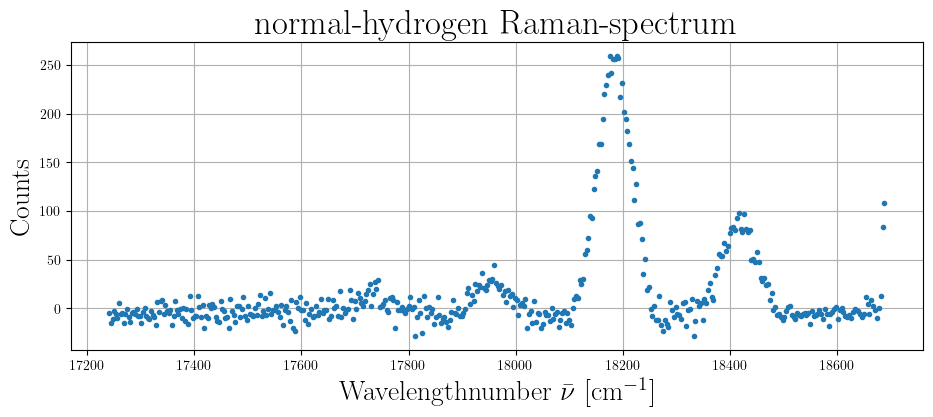

In [921]:
%matplotlib inline
fig = plt.figure(figsize=(11,4))
plt.errorbar(data_H2["wavenumber"], data_H2["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("normal-hydrogen Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

#plt.ylim(-0.10,200)
#plt.xlim(17650,17850)
plt.show()

In [922]:
# defining peak ranges
peak1 = data_H2[(data_H2["wavenumber"] > 18300) & (data_H2["wavenumber"] < 18500)]
peak2 = data_H2[(data_H2["wavenumber"] > 18050) & (data_H2["wavenumber"] < 18300)]
peak3 = data_H2[(data_H2["wavenumber"] > 17850) & (data_H2["wavenumber"] < 18050)]
peak4 = data_H2[(data_H2["wavenumber"] > 17650) & (data_H2["wavenumber"] < 17850)]


initial_guesses_voigt = [
    [100, 18420.69, 29.98, 5],  # Peak 1
    [250, 18186.511476, 20.61, 5], # Peak 2
    [25.56, 17900.86, 25.11, 5],  # Peak 3
    [20.43, 17550, 25, 0.3],  # Peak 4
]

# Fit each peak with the Voigt profile
# Voigt profile function
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=500000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

popt1, perr1 = fit_voigt(peak1["wavenumber"], peak1["count"], initial_guesses_voigt[0])
popt2, perr2 = fit_voigt(peak2["wavenumber"], peak2["count"], initial_guesses_voigt[1])
popt3, perr3 = fit_voigt(peak3["wavenumber"], peak3["count"], initial_guesses_voigt[2])
popt4, perr4 = fit_voigt(peak4["wavenumber"], peak4["count"], initial_guesses_voigt[3])


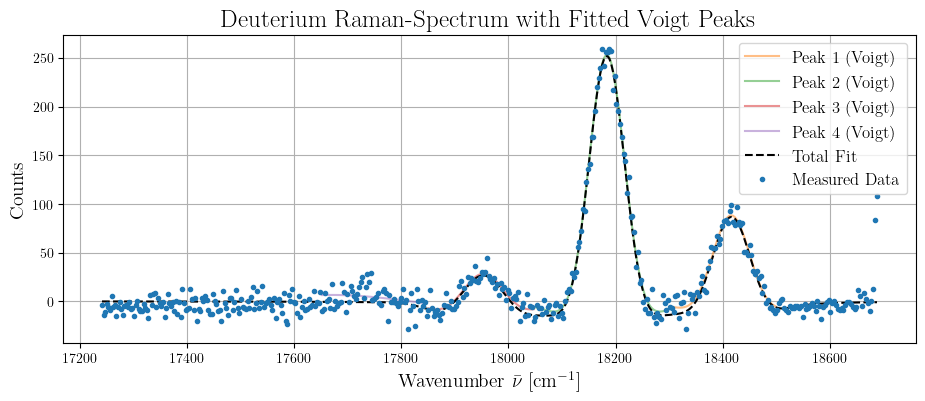

     peak        center  error_center  gaussian_width  lorentzian_width  \
0  Peak 1  18416.005988      0.990601       41.236807        -25.043556   
1  Peak 2  18183.741329      0.368989       37.362752        -14.940424   
2  Peak 3  17953.484184      2.184752       59.183435        -94.222083   

      intensity  
0   5211.301774  
1  16698.956317  
2    626.835926  


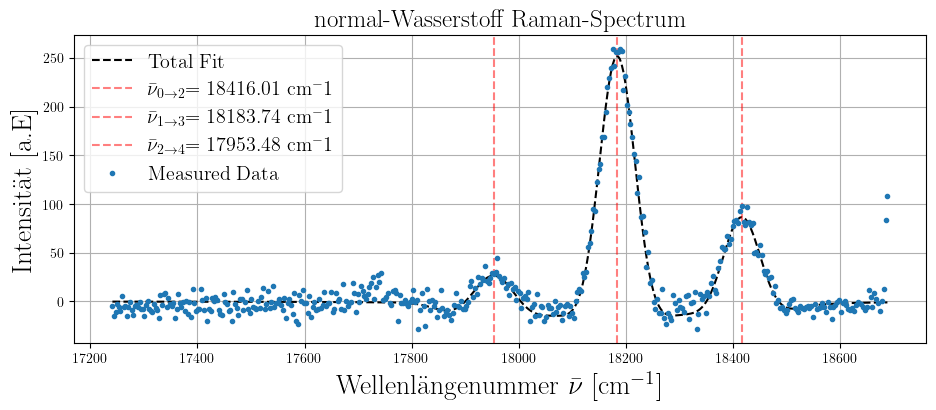

In [923]:
# Total Voigt fit for the entire spectrum
total_fit = (
    voigt(data_H2["wavenumber"], *popt1) +
    voigt(data_H2["wavenumber"], *popt2) +
    voigt(data_H2["wavenumber"], *popt3) 
)

# Plot individual Voigt fits and the measured spectrum
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data_H2["wavenumber"], data_H2["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(peak1["wavenumber"], voigt(peak1["wavenumber"], *popt1), label="Peak 1 (Voigt)", alpha=0.5)
plt.plot(peak2["wavenumber"], voigt(peak2["wavenumber"], *popt2), label="Peak 2 (Voigt)", alpha=0.5)
plt.plot(peak3["wavenumber"], voigt(peak3["wavenumber"], *popt3), label="Peak 3 (Voigt)", alpha=0.5)
plt.plot(peak4["wavenumber"], voigt(peak4["wavenumber"], *popt4), label="Peak 4 (Voigt)", alpha=0.5)

# Plot the total fit
plt.plot(data_H2["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Voigt Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()
# Extract Voigt fit parameters for each peak
peak_info_H2 = {
    "peak": ["Peak 1", "Peak 2", "Peak 3"], 
    "center": [popt1[1], popt2[1], popt3[1]],
    "error_center" : [perr1[1],perr2[1], perr3[1]],
    "gaussian_width": [popt1[2], popt2[2], popt3[2]],
    "lorentzian_width": [popt1[3], popt2[3], popt3[3]],
    "intensity": [popt1[0], popt2[0], popt3[0]],
}
# Create and display DataFrame
peak_df_H2 = pd.DataFrame(peak_info_H2)
print(peak_df_H2)

# Plot with vertical lines for peak center positions
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data_H2["wavenumber"], data_H2["count"], linestyle='None', fmt='.', label="Measured Data")

# Plot the total fit
plt.plot(data_H2["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add vertical lines for peak centers
for center in peak_df_H2["center"]:
    indx = list(peak_df_H2["center"]).index(center)
    plt.axvline(center, color='red', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{{} \to {}}}$= {:.2f} cm$^-$$1$".format(indx,indx+2,center))

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize='x-large')

# Add labels and grid
plt.title("normal-Wasserstoff Raman-Spectrum", fontsize=18)
plt.xlabel(r"Wellenlängenummer $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensität [a.E] ", fontsize=20)
plt.grid()
plt.savefig("H2_spektrum.png")
plt.show()

In [924]:
B_arrayH2 = np.zeros(3)
for i in range(0,len(peak_df_H2["center"])):
    if i > 0:
        temp = (peak_df_H2["center"][i-1]-peak_df_H2["center"][i])/4
        B_arrayH2[i] = temp
        print("Distance from Delta J: {} -> {} : {:.2f}".format(i-1, i+1, temp*4))
B_expH2, dB_expH2 = B_arrayH2[1:].mean(), B_arrayH2[1:].std()
print("B_exp,H2 = ({:.1f} +/- {:.1f}) cm-1".format(B_expH2, dB_expH2))
r_H2 = 74e-12 #in m
mu_expH2 = const.Planck/(8*np.pi**2*const.speed_of_light*B_expH2*1e2*r_H2**2)
dmu_expH2 = mu_expH2*(dB_expH2/B_expH2)
print("mu_exp,H2 = ({:.3f} +/- {:.3f}) u".format(mu_expH2/const.atomic_mass, dmu_expH2/const.atomic_mass))
print("expected reduced mass  = {:.4f} u".format(1.000794/2))

Distance from Delta J: 0 -> 2 : 232.26
Distance from Delta J: 1 -> 3 : 230.26
B_exp,H2 = (57.8 +/- 0.3) cm-1
mu_exp,H2 = (0.532 +/- 0.002) u
expected reduced mass  = 0.5004 u


In [925]:
m_H = const.atomic_mass * 1.00794  # Mass of Deuterium atom (kg)
r_H2 = 74e-12  # Bond length for D2 in meters 

# Reduced mass for Deuterium molecule
mu_H2 = (m_H * m_H) / (m_H + m_H)

# Calculate rotational constant B in cm^-1
B_H2 = B(mu_H2, r_H2)*1e-2# Convert to cm^-1 (1 m = 100 cm)

# Rotational quantum numbers J
J = np.arange(0, 3, 1)

# Calculate rotational transition energies
wavenr_rot = pv_rot(B_H2, J) #cm-1
wavenr_laser = 1/535*10**7 # cm-1
# Print results
print(f"Rotational constant B for Hydrogen (H2): {B_H2:.4f} cm⁻¹")
print(f"Deviation from B_theo and B_exp : sigam = {abs(B_H2-B_expH2)/dB_expH2:.2f}\n")
print("Expected wavelength number of Raman-lines (Delta J = 2):")
for j, v in zip(J, wavenr_rot):
    temp = wavenr_laser-v
    v_exp = peak_df_H2["center"]
    dv = peak_df_H2["error_center"]
    sigma = abs(temp-v_exp[j])/dv[j]
    print(f"Wavenumber for J = {j} -> J = {j+2}:\n Expected: {temp:.2f} cm^{-1} \t Measured: {v_exp[j]:.2f} \t Deviation: {sigma:.2f}")

Rotational constant B for Hydrogen (H2): 61.0841 cm⁻¹
Deviation from B_theo and B_exp : sigam = 13.03

Expected wavelength number of Raman-lines (Delta J = 2):
Wavenumber for J = 0 -> J = 2:
 Expected: 18325.08 cm^-1 	 Measured: 18416.01 	 Deviation: 91.78
Wavenumber for J = 1 -> J = 3:
 Expected: 18080.75 cm^-1 	 Measured: 18183.74 	 Deviation: 279.12
Wavenumber for J = 2 -> J = 4:
 Expected: 17836.41 cm^-1 	 Measured: 17953.48 	 Deviation: 53.59


### para-Wasserstoff measurements

We repeat the same procedure we used for para-hydrogen

In [928]:
# importing deuterium data
paraH2_data = pd.read_csv("Measurements/para_H2.txt", sep='\t', decimal=',', header=None)
paraH2_Underground_data = pd.read_csv("Measurements/para_H2_Untergrund_neu.txt", sep='\t',decimal=',', header=None)
paraH2_data.columns = ["a", "b", "wavelength", "counts"]
paraH2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

paraH2_data["wavenumber"] = 1/paraH2_data["wavelength"]
paraH2_Underground_data["wavenumber"] = 1/paraH2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
paraH2_data["wavenumber"] = paraH2_data["wavenumber"]*10**7
paraH2_Underground_data["wavenumber"] = paraH2_Underground_data["wavenumber"]*10**7
paraH2_data["count"] = paraH2_data["counts"] - paraH2_Underground_data["counts"]

In [929]:
# Group data by wavenumber and average the counts across all 'a' values
data_paraH2 = paraH2_data.groupby("wavenumber", as_index=False)["counts"].mean()
data_paraH2Er = paraH2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()

data_paraH2['count'] = data_paraH2['counts'] - data_paraH2Er['counts']

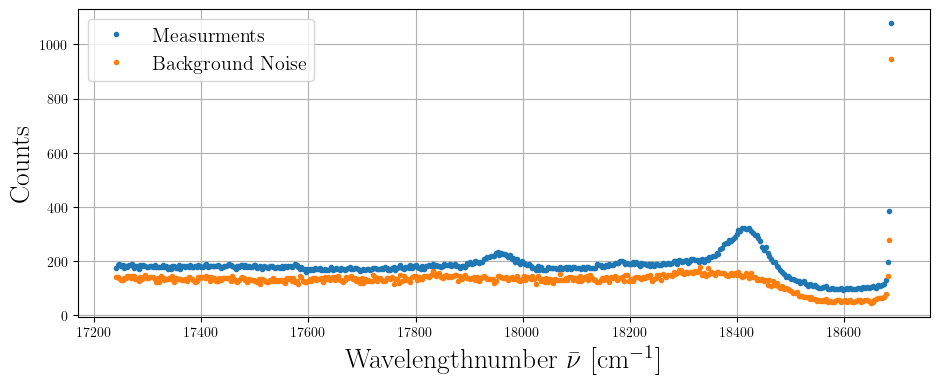

In [930]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data_paraH2["wavenumber"], data_paraH2["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(data_paraH2Er["wavenumber"], data_paraH2Er["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

Since we notice that the background noise does not matche the measurements we 

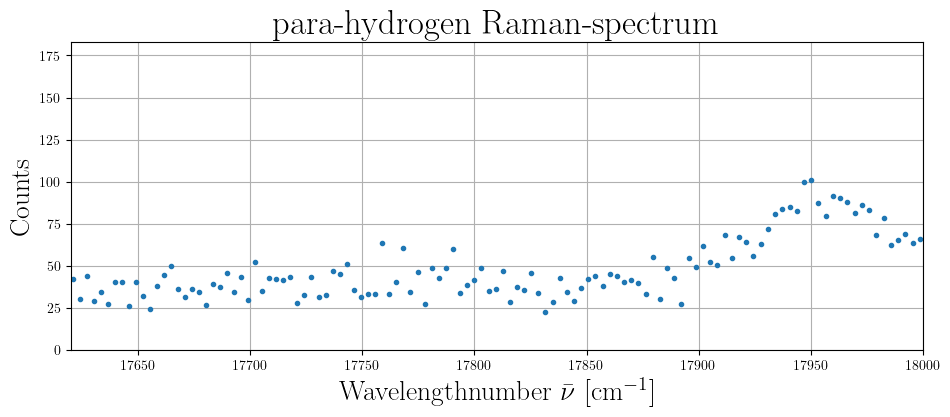

In [932]:
%matplotlib inline
fig = plt.figure(figsize=(11,4))
plt.errorbar(data_paraH2["wavenumber"], data_paraH2["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("para-hydrogen Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

plt.ylim(-0.10,183)
plt.xlim(17620,18000)
plt.show()

In [933]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit

# Voigt profile with fixed Gaussian parameters (mean=0, std=1)
def voigt_fixed(x, A, gamma):
    z = (x + 1j * gamma) / np.sqrt(2)  # mean = 0, std = 1
    return A * np.real(wofz(z)) / np.sqrt(2 * np.pi)

# Fit the Voigt profile with fixed Gaussian parameters
def fit_voigt_fixed(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt_fixed, x_data, y_data, p0=p0, maxfev=50000)
    return popt, pcov


In [934]:
# defining peak ranges
peak1 = data_paraH2[(data_paraH2["wavenumber"] > 18325) & (data_paraH2["wavenumber"] < 18520)]
peak2 = data_paraH2[(data_paraH2["wavenumber"] > 18075) & (data_paraH2["wavenumber"] < 18300)]
peak3 = data_paraH2[(data_paraH2["wavenumber"] > 17855) & (data_paraH2["wavenumber"] < 18060)]
peak4 = data_paraH2[(data_paraH2["wavenumber"] > 17700) & (data_paraH2["wavenumber"] < 17850)]
peak5 = data_paraH2[(data_paraH2["wavenumber"] > 17400) & (data_paraH2["wavenumber"] < 17600)]


initial_guesses_voigt = [
    [175, 18471.69, 29.98, 5],  # Peak 1
    [75, 18200.58, 31.61, 5], # Peak 2
    [90.56, 17950.86, 25.11, 5],  # Peak 3
    [10.43, 17775, 25, 0.3],  # Peak 4
    [20.43, 17529.906990620268, 24.34, 5],  # Peak 5

]

# Fit each peak with the Voigt profile
# Voigt profile function
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))+43

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=50000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

popt1, perr1 = fit_voigt(peak1["wavenumber"], peak1["count"], initial_guesses_voigt[0])
popt2, perr2 = fit_voigt(peak2["wavenumber"], peak2["count"], initial_guesses_voigt[1])
popt3, perr3 = fit_voigt(peak3["wavenumber"], peak3["count"], initial_guesses_voigt[2])
popt4, perr4 = fit_voigt(peak4["wavenumber"], peak4["count"], initial_guesses_voigt[3])
popt5, perr5 = fit_voigt(peak5["wavenumber"], peak5["count"], initial_guesses_voigt[4])

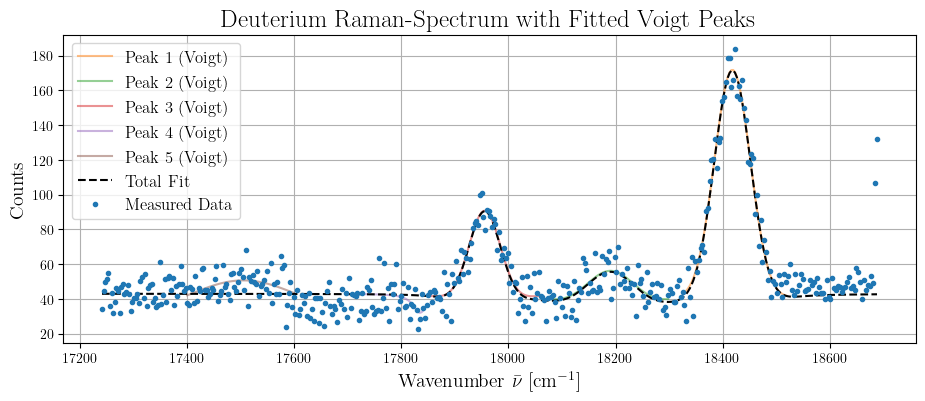

     peak        center  error_center  gaussian_width  lorentzian_width  \
0  Peak 1  18418.067351      0.800741       35.448018         -5.674831   
1  Peak 2  18190.541724      5.846439       63.860793        -87.784707   
2  Peak 3  17955.774156      1.565580       32.167271        -10.329186   

      intensity  
0  10034.945651  
1    448.055943  
2   2925.462639  


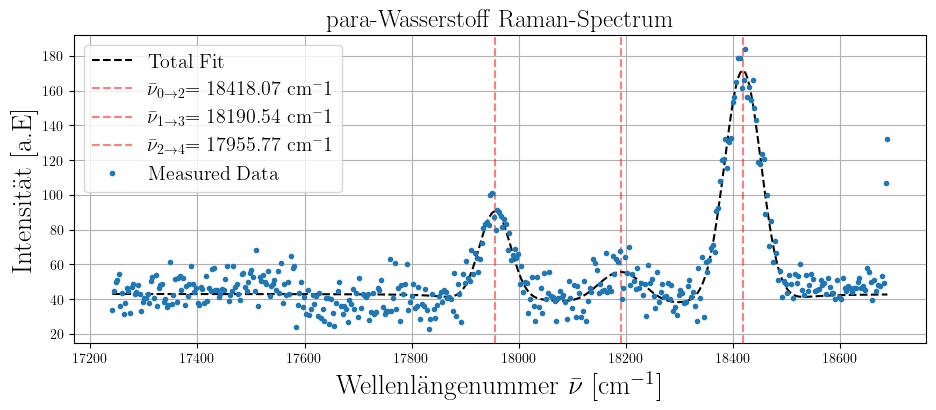

In [935]:
# Total Voigt fit for the entire spectrum
total_fit = (
    voigt(data_paraH2["wavenumber"], *popt1) +
    voigt(data_paraH2["wavenumber"], *popt2) +
    voigt(data_paraH2["wavenumber"], *popt3) -43*2

)

# Plot individual Voigt fits and the measured spectrum
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data_paraH2["wavenumber"], data_paraH2["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(peak1["wavenumber"], voigt(peak1["wavenumber"], *popt1), label="Peak 1 (Voigt)", alpha=0.5)
plt.plot(peak2["wavenumber"], voigt(peak2["wavenumber"], *popt2), label="Peak 2 (Voigt)", alpha=0.5)
plt.plot(peak3["wavenumber"], voigt(peak3["wavenumber"], *popt3), label="Peak 3 (Voigt)", alpha=0.5)
plt.plot(peak4["wavenumber"], voigt(peak4["wavenumber"], *popt4), label="Peak 4 (Voigt)", alpha=0.5)
plt.plot(peak5["wavenumber"], voigt(peak5["wavenumber"], *popt5), label="Peak 5 (Voigt)", alpha=0.5)

# Plot the total fit
plt.plot(data_paraH2["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Voigt Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()
# Extract Voigt fit parameters for each peak
peak_info_paraH2 = {
    "peak": ["Peak 1", "Peak 2", "Peak 3"], 
    "center": [popt1[1], popt2[1], popt3[1]],
    "error_center" : [perr1[1],perr2[1], perr3[1]],
    "gaussian_width": [popt1[2], popt2[2], popt3[2]],
    "lorentzian_width": [popt1[3], popt2[3], popt3[3]],
    "intensity": [popt1[0], popt2[0], popt3[0]],
}
# Create and display DataFrame
peak_df_paraH2 = pd.DataFrame(peak_info_paraH2)
print(peak_df_paraH2)

# Plot with vertical lines for peak center positions
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data_paraH2["wavenumber"], data_paraH2["count"], linestyle='None', fmt='.', label="Measured Data")

# Plot the total fit
plt.plot(data_paraH2["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add vertical lines for peak centers
for center in peak_df_paraH2["center"]:
    indx = list(peak_df_paraH2["center"]).index(center)
    plt.axvline(center, color='red', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{{} \to {}}}$= {:.2f} cm$^-$$1$".format(indx,indx+2,center))

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize='x-large')

# Add labels and grid
plt.title("para-Wasserstoff Raman-Spectrum", fontsize=18)
plt.xlabel(r"Wellenlängenummer $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensität [a.E] ", fontsize=20)
plt.grid()
plt.savefig("paraH2_spektrum.png")
plt.show()

Due to the unproper measurement for the background we were not able to fit a voigt profile into what we suspect is the Raman-line $\nu_{3\to 5}$, $\nu_{5\to 7}$, $\nu_{6\to 8}$. The line $\nu_{7\to 9}$ is not recognizeble

In [937]:
B_array_paraH2 = np.zeros(len(peak_df_paraH2["center"]))
for i in range(0,len(peak_df_paraH2["center"])):
    if i > 0:
        temp = (peak_df_paraH2["center"][i-1]-peak_df_paraH2["center"][i])/4
        B_array_paraH2[i] = temp
        print("Distance from Delta J: {} -> {} : {:.2f}".format(i-1, i+1, temp*4))
B_exp_paraH2, dB_exp_paraH2 = B_array_paraH2[1:].mean(), B_array_paraH2[1:].std()
print("B_exp,H2 = ({:.1f} +/- {:.1f}) cm-1".format(B_exp_paraH2, dB_exp_paraH2))
r_H2 = 74e-12 #in m
mu_exp_paraH2 = const.Planck/(8*np.pi**2*const.speed_of_light*B_exp_paraH2*1e2*r_H2**2)
dmu_expH2 = mu_exp_paraH2*(dB_exp_paraH2/B_exp_paraH2)
print("mu_exp,H2 = ({:.3f} +/- {:.3f}) u".format(mu_exp_paraH2/const.atomic_mass, dmu_exp_paraH2/const.atomic_mass))
print("expected reduced mass  = {:.4f} u".format(1.000794/2))

Distance from Delta J: 0 -> 2 : 227.53
Distance from Delta J: 1 -> 3 : 234.77
B_exp,H2 = (57.8 +/- 0.9) cm-1
mu_exp,H2 = (0.533 +/- 0.281) u
expected reduced mass  = 0.5004 u


In [938]:
m_H = const.atomic_mass * 1.00794  # Mass of Deuterium atom (kg)
r_H2 = 74e-12  # Bond length for D2 in meters 

# Reduced mass for Deuterium molecule
mu_H2 = (m_H * m_H) / (m_H + m_H)

# Calculate rotational constant B in cm^-1
B_H2 = B(mu_H2, r_H2)*1e-2# Convert to cm^-1 (1 m = 100 cm)

# Rotational quantum numbers J
J = np.arange(0, 3, 1)

# Calculate rotational transition energies
wavenr_rot = pv_rot(B_H2, J) #cm-1
wavenr_laser = 1/535*10**7 # cm-1
# Print results
print(f"Rotational constant B for Hydrogen (H2): {B_H2:.4f} cm⁻¹")
print(f"Deviation from B_theo and B_exp : sigam = {abs(B_H2-B_exp_paraH2)/dB_exp_paraH2:.2f}\n")
print("Expected wavelength number of Raman-lines (Delta J = 2):")
for j, v in zip(J, wavenr_rot):
    temp = wavenr_laser-v
    v_exp = peak_df_paraH2["center"]
    dv = peak_df_paraH2["error_center"]
    sigma = abs(temp-v_exp[j])/dv[j]
    print(f"Wavenumber for J = {j} -> J = {j+2}:\n Expected: {temp:.2f} cm^{-1} \t Measured: {v_exp[j]:.2f} \t Deviation: {sigma:.2f}")

Rotational constant B for Hydrogen (H2): 61.0841 cm⁻¹
Deviation from B_theo and B_exp : sigam = 3.64

Expected wavelength number of Raman-lines (Delta J = 2):
Wavenumber for J = 0 -> J = 2:
 Expected: 18325.08 cm^-1 	 Measured: 18418.07 	 Deviation: 116.12
Wavenumber for J = 1 -> J = 3:
 Expected: 18080.75 cm^-1 	 Measured: 18190.54 	 Deviation: 18.78
Wavenumber for J = 2 -> J = 4:
 Expected: 17836.41 cm^-1 	 Measured: 17955.77 	 Deviation: 76.24


### Suaerstoffspektrum und Sticksotffspektrum

From the measurements of nitrogen and oxygen we aim to determine the vibration energy. From the theory, we know:
$$E_{vib} = \frac{h}{2\pi} \omega ( v + \frac{1}{2}) $$
with: $$\omega = \sqrt{\frac{\kappa}{m_r}}$$

In [941]:
# importing oxygen data
O2_data = pd.read_csv("Measurements/O2.txt", sep='\t', decimal=',', header=None)
O2_Underground_data = pd.read_csv("Measurements/O2_Untergrund.txt", sep='\t',decimal=',', header=None)
O2_data.columns = ["a", "b", "wavelength", "counts"]
O2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

O2_data["wavenumber"] = 1/O2_data["wavelength"]
O2_Underground_data["wavenumber"] = 1/O2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
O2_data["wavenumber"] = O2_data["wavenumber"]*10**7
O2_Underground_data["wavenumber"] = O2_Underground_data["wavenumber"]*10**7
O2_data["count"] = O2_data["counts"] - O2_Underground_data["counts"]

# importing nitrogen data
N2_data = pd.read_csv("Measurements/N2_neu.txt", sep='\t', decimal=',', header=None)
N2_Underground_data = pd.read_csv("Measurements/N2_Untergrund_neu.txt", sep='\t',decimal=',', header=None)
N2_data.columns = ["a", "b", "wavelength", "counts"]
N2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

N2_data["wavenumber"] = 1/N2_data["wavelength"]
N2_Underground_data["wavenumber"] = 1/N2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
N2_data["wavenumber"] = N2_data["wavenumber"]*10**7
N2_Underground_data["wavenumber"] = N2_Underground_data["wavenumber"]*10**7
N2_data["count"] = N2_data["counts"] - N2_Underground_data["counts"]


In [942]:
# Group data by wavenumber and average the counts across all 'a' values
Odata = O2_data.groupby("wavenumber", as_index=False)["counts"].mean()
OdataEr = O2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()
Odata['count'] = Odata['counts'] - OdataEr['counts']

Ndata = N2_data.groupby("wavenumber", as_index=False)["counts"].mean()
NdataEr = N2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()
Ndata['count'] = Ndata['counts'] - NdataEr['counts']

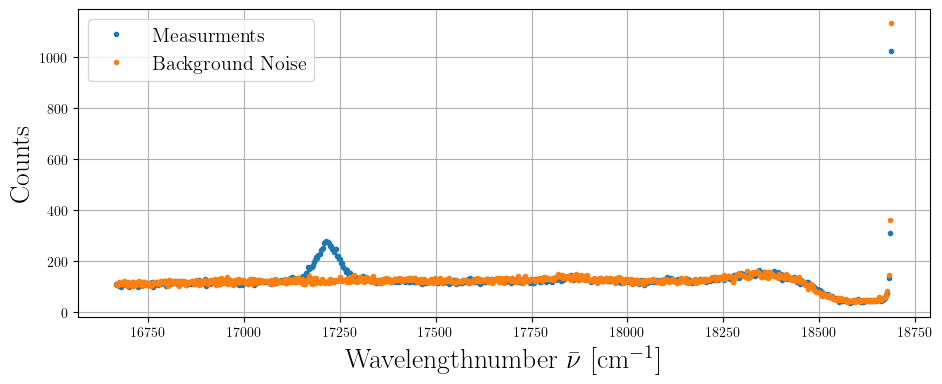

In [943]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(Odata["wavenumber"], Odata["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(OdataEr["wavenumber"], OdataEr["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

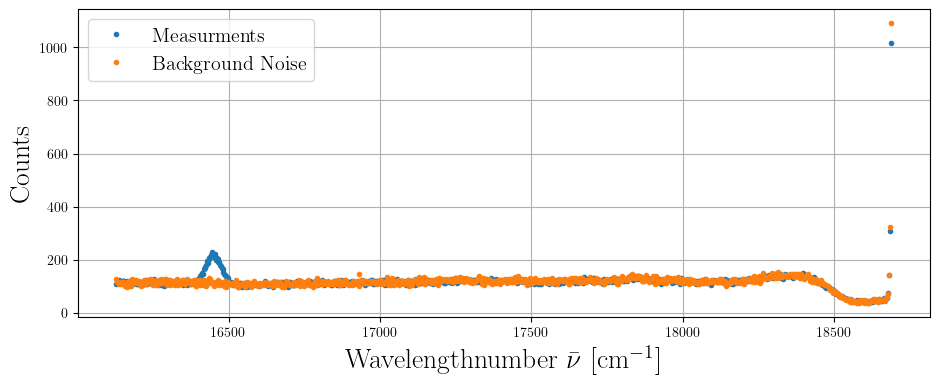

In [944]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(Ndata["wavenumber"], Ndata["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(NdataEr["wavenumber"], NdataEr["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

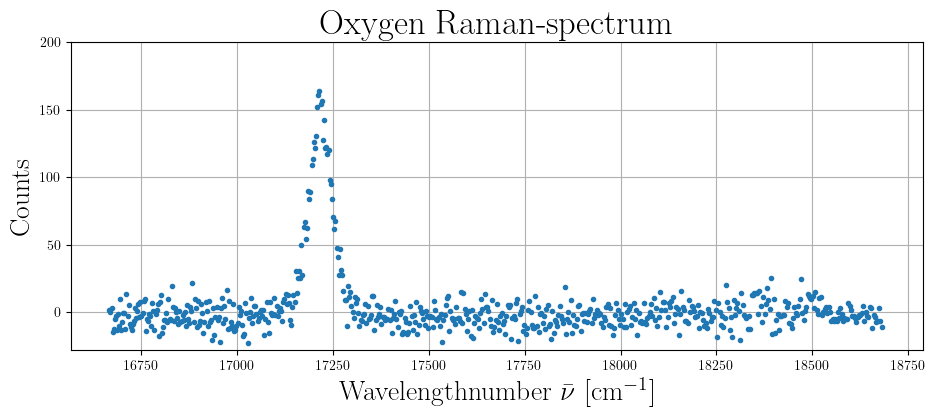

In [945]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(Odata["wavenumber"], Odata["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Oxygen Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

plt.ylim(-28,200)
#plt.xlim(17400,17250)
plt.show()

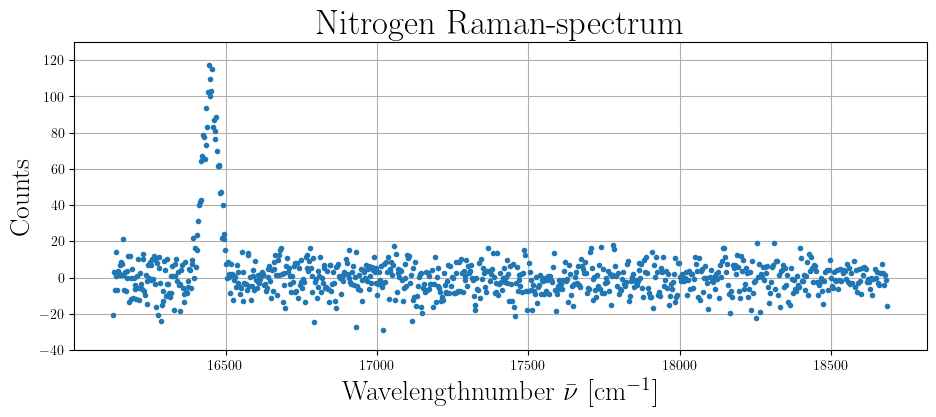

In [946]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(Ndata["wavenumber"], Ndata["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Nitrogen Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

plt.ylim(-40,130)
#plt.xlim(537,560)
plt.show()

In [947]:
# defining peak ranges
peak_o = Odata[(Odata["wavenumber"] > 17100) & (Odata["wavenumber"] < 17400)]
peak_n = Ndata[(Ndata["wavenumber"] > 16450) & (Ndata["wavenumber"] < 16550)]

# Updated initial guesses based on Gaussian fits
initial_guesses_voigt = [
    [89.39, 17150.69, 29.98, 5],  # Peak oxygen
    [0, 16400, 166, 1], # Peak nitrogen
]
def voigt(x, A, x0, sigma, gamma):
    z = ((x - x0) + 1j * gamma) / (sigma * np.sqrt(2))
    return A * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

# Fit the Voigt profile to the data
def fit_voigt(x_data, y_data, p0):
    popt, pcov = curve_fit(voigt, x_data, y_data, p0=p0, maxfev=50000)
    return popt, np.sqrt(np.diag(pcov))  # Return parameters and errors

# Fit each peak with the Voigt profile
popt_o, perr_o = fit_voigt(peak_o["wavenumber"], peak_o["count"], initial_guesses_voigt[0])
popt_n, perr_n = fit_voigt(peak_n["wavenumber"], peak_n["count"], initial_guesses_voigt[1])


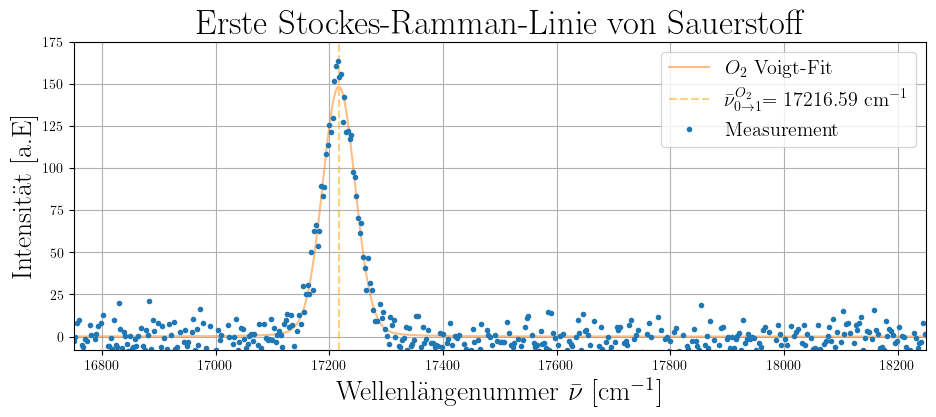

In [948]:
peak_info_vib = {
    "peak": ["O_2", "N_2"], 
    "center": [popt_o[1], popt_n[1]],
    "error_center" : [perr_o[1],perr_n[1]],
    "gaussian_width": [popt_o[2], popt_n[2]],
    "lorentzian_width": [popt_o[3], popt_n[3]],
    "intensity": [popt_o[0], popt_n[0]],
}
fig = plt.figure(figsize=(11,4))
plt.errorbar(Odata["wavenumber"], Odata["count"], 
             linestyle='None', fmt='.', label= "Measurement")

plt.plot(Odata["wavenumber"], voigt(Odata["wavenumber"], *popt_o), label=r"$O_2$ Voigt-Fit", alpha=0.5)
plt.axvline(popt_o[1], color='orange', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{0 \to 1}}^{{O_2}}$= {:.2f} cm$^-$$^1$".format(popt_o[1]))

plt.grid()
plt.title(r"Erste Stockes-Ramman-Linie von Sauerstoff", fontsize=25)
plt.xlabel(r"Wellenlängenummer $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensität [a.E] ", fontsize=20)
plt.legend(fontsize="x-large")
plt.ylim(-8,175)
plt.xlim(16750,18250)
plt.savefig("02_spektrum.png")
plt.show()

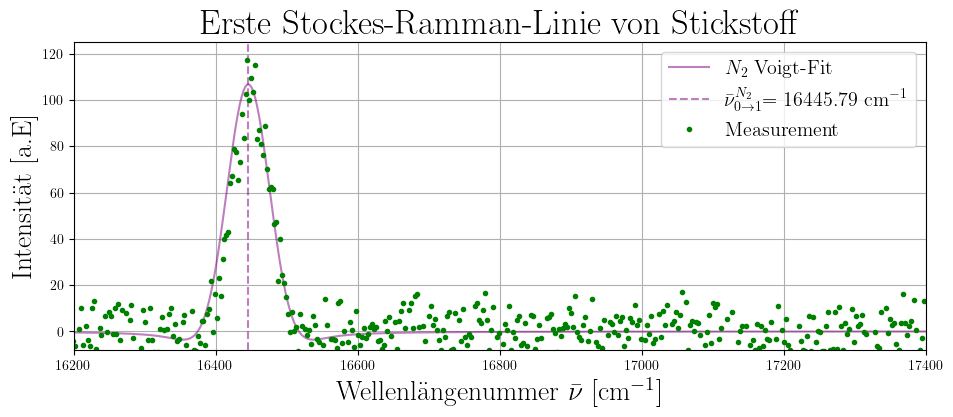

In [949]:
peak_info_vib = {
    "peak": ["O_2", "N_2"], 
    "center": [popt_o[1], popt_n[1]],
    "error_center" : [perr_o[1],perr_n[1]],
    "gaussian_width": [popt_o[2], popt_n[2]],
    "lorentzian_width": [popt_o[3], popt_n[3]],
    "intensity": [popt_o[0], popt_n[0]],
}
fig = plt.figure(figsize=(11,4))
#plt.errorbar(Odata["wavenumber"], Odata["count"], 
#             linestyle='None', fmt='.', label= "Measurement: Oxygen")
plt.errorbar(Ndata["wavenumber"], Ndata["count"], 
             linestyle='None', fmt='.', color='green', label="Measurement")
#plt.plot(Odata["wavenumber"], voigt(Odata["wavenumber"], *popt_o), label="Oxigen Voigt-Fit", alpha=0.5)
plt.plot(Ndata["wavenumber"], voigt(Ndata["wavenumber"], *popt_n), label=r"$N_2$ Voigt-Fit", alpha=0.5, color="purple")
#plt.axvline(popt_o[1], color='orange', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{0 \to 1}}^{{O_2}}$= {:.2f} cm$^-$$^1$".format(popt_o[1]))
plt.axvline(popt_n[1], color='purple', linestyle='--', alpha=0.5, label=r"$\bar{{\nu}}_{{0 \to 1}}^{{N_2}}$= {:.2f} cm$^-$$^1$".format(popt_n[1]))

plt.grid()
plt.title(r"Erste Stockes-Ramman-Linie von Stickstoff", fontsize=25)
plt.xlabel(r"Wellenlängenummer $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensität [a.E] ", fontsize=20)
plt.legend(fontsize="x-large")
plt.ylim(-8,125)
plt.xlim(16200,17400)
plt.savefig("N2_spektrum.png")
plt.show()

Um die Schwingungsübergangsenergie zu berechnen soll man zum erst die Walenlängenänderung bestimmt werdern:
$$ \Delta \nu = \nu_{laser} - \nu_{stockes}.$$
Die Schwingungsübergangsenergie kann schließlich mit folgendem Ausdruck gerechnet werden:
$$ E = hc\Delta \nu $$

In [951]:
wavelength_laser = 1/535e-7 # cm-1
Dnu_o = (wavelength_laser-peak_info_vib["center"][0])*10**(2) #m-1
Dnu_o_err = peak_info_vib["error_center"][0]*10**(2) # m-1
Dnu_n = (wavelength_laser-peak_info_vib["center"][1] )*10**(2)
Dnu_n_err = peak_info_vib["error_center"][1]*10**(2)
E_o = (const.Planck*const.speed_of_light*Dnu_o)/const.e #eV
E_o_err = E_o*Dnu_o_err/Dnu_o # eV
print(r"Sauerstoff")
print(r"\Delta \nu = ({:.1f} \pm {:.1f}) cm^-1 ".format(Dnu_o*10**(-2), Dnu_o_err*10**(-2)))
print(r" Übergansenergie E = ({:.2f} \pm {:.2f}) 10^-3 eV".format(E_o*10**3, E_o_err*10**3))
E_n = (const.Planck*const.speed_of_light*Dnu_n)/const.e #eV
E_n_err = (E_o*Dnu_n_err/Dnu_n) #eV
print("")
print(r" Stickstoff ")
print(r"\Delta \nu = ({:.1f} \pm {:.1f}) cm^-1".format(Dnu_n*10**(-2), Dnu_n_err*10**(-2)))
print(r" Übergansenergie E = ({:.1f} \pm {:.1f}) 10^-3 eV".format(E_n*10**3, E_n_err*10**3))

Sauerstoff
\Delta \nu = (1475.0 \pm 0.5) cm^-1 
 Übergansenergie E = (182.88 \pm 0.07) 10^-3 eV

 Stickstoff 
\Delta \nu = (2245.8 \pm 5.8) cm^-1
 Übergansenergie E = (278.4 \pm 0.5) 10^-3 eV
